In [1]:
from clickhouse_driver import Client

client = Client('oleg.orbita.work', port = 9000, user='student_ml',
password='CGRV8zemLGgsfdz7Uc6ZJeisGTcPQa', settings={'use_numpy': True})
client.execute('SHOW DATABASES')

[array(['students_datas'], dtype='<U14')]

In [2]:
table_name = 'students_datas.game_sales'
# .drop(labels=['Name', 'Genre', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1)
%config InlineBackend.figure_format = 'svg' 

In [3]:
df = client.query_dataframe(f"SELECT * FROM {table_name}")
columns = df.columns
df.head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81
1,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05,4.50
2,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
3,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
4,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
5,Frogger,2600,1981.0,Action,Parker Bros.,2.06,0.12,0.0,0.02,2.20
6,Demon Attack,2600,1981.0,Shooter,Imagic,1.99,0.12,0.0,0.02,2.13
7,E.T.: The Extra Terrestrial,2600,1981.0,Action,Atari,1.84,0.11,0.0,0.02,1.97
8,Ms. Pac-Man,2600,1981.0,Puzzle,Atari,1.54,0.10,0.0,0.02,1.65
9,Dig Dug,2600,1982.0,Puzzle,Atari,1.52,0.10,0.0,0.02,1.64


In [4]:
df = df.dropna()
df.head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81
1,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05,4.50
2,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
3,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
5,Frogger,2600,1981.0,Action,Parker Bros.,2.06,0.12,0.0,0.02,2.20
6,Demon Attack,2600,1981.0,Shooter,Imagic,1.99,0.12,0.0,0.02,2.13
7,E.T.: The Extra Terrestrial,2600,1981.0,Action,Atari,1.84,0.11,0.0,0.02,1.97
8,Ms. Pac-Man,2600,1981.0,Puzzle,Atari,1.54,0.10,0.0,0.02,1.65
9,Dig Dug,2600,1982.0,Puzzle,Atari,1.52,0.10,0.0,0.02,1.64
10,River Raid,2600,1981.0,Shooter,Activision,1.49,0.09,0.0,0.02,1.60


In [5]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

<Axes: xlabel='Genre'>

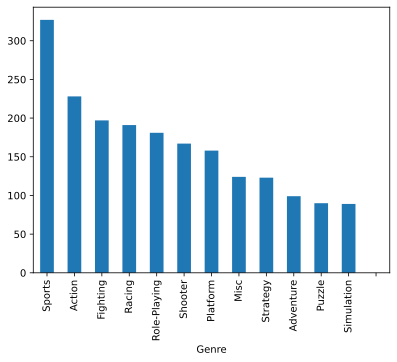

In [6]:
# Игры каких жанров были наиболее популярны до 2000 года, а какие после?
# Оцените популярность жанров по количеству выпущенных игр и по объему продаж по всему миру.
df.loc[df['Year'] < 2000]['Genre'].value_counts().sort_values(ascending=False).plot(kind='bar')

C:\Users\grish\AppData\Local\Temp\ipykernel_16520\461424273.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[df['Year'] < 2000].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='crimson')


<Axes: xlabel='Genre'>

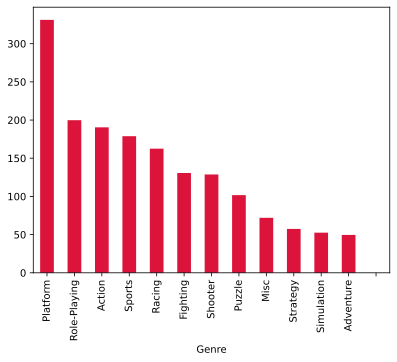

In [7]:
df.loc[df['Year'] < 2000].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='crimson')

<Axes: xlabel='Genre'>

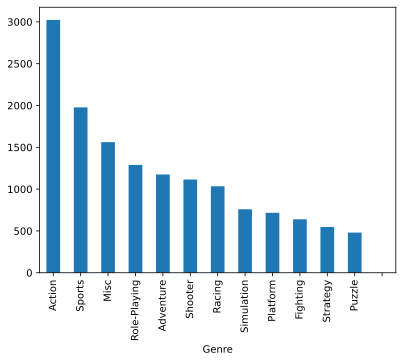

In [8]:
df.loc[df['Year'] >= 2000]['Genre'].value_counts().sort_values(ascending=False).plot(kind='bar')

C:\Users\grish\AppData\Local\Temp\ipykernel_16520\2704003596.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[df['Year'] >= 2000].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='crimson')


<Axes: xlabel='Genre'>

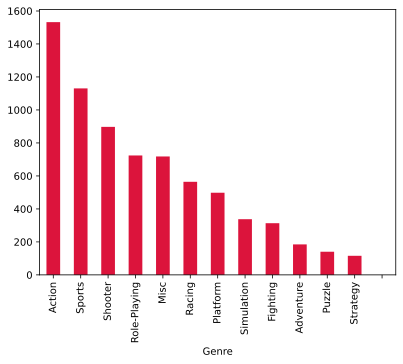

In [9]:
df.loc[df['Year'] >= 2000].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='crimson')

#### Самые популярные жанры по выпуску игр: Спортивные и Экшен 

#### Самые популярные жанры по продажам: (Платформеры и ролевые) (Спортивные и Экшн)

C:\Users\grish\AppData\Local\Temp\ipykernel_16520\934721613.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[df['Year'] < 2000].groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False).plot(kind='bar', color='gold')


<Axes: xlabel='Genre'>

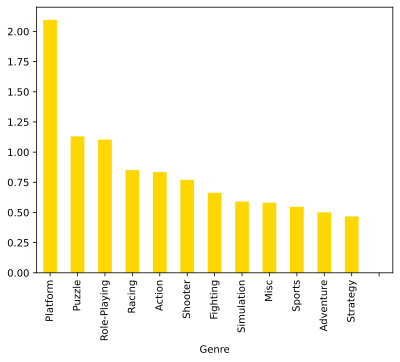

In [10]:
df.loc[df['Year'] < 2000].groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False).plot(kind='bar', color='gold')

#### Платформеры выпускаются меньше, но, судя по всему, у жанра есть своя аудитория, готовая тратить большие деньги, и единицы компаний разработки, которые ставят высокие цены, производя небольшое количество игр.
#### Предположу, что это Нинтендо

<Axes: xlabel='Publisher'>

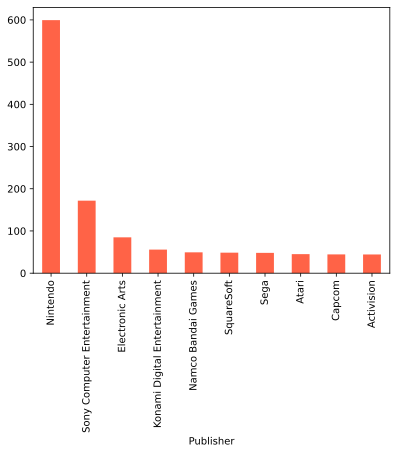

In [11]:
df.loc[df['Year'] < 2000].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='tomato')

###### ну кто-ж ещё...

<Axes: xlabel='Publisher'>

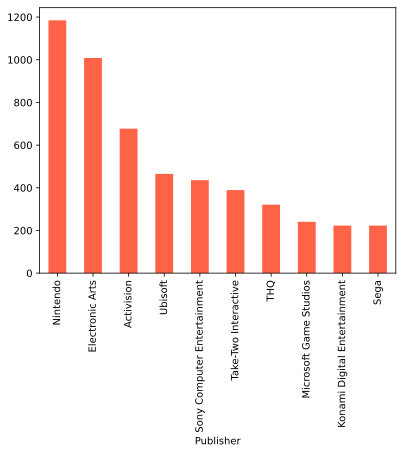

In [12]:
df.loc[df['Year'] >= 2000].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='tomato')

##### положение в общем и целом не изменилось, добавились другие гиганты индустрии, которые также сделали игры, положившие начало новым жанрам

C:\Users\grish\AppData\Local\Temp\ipykernel_16520\1826683221.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[df['Year'] >= 2000].groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(30).plot(kind='bar', color='orange')


<Axes: xlabel='Name'>

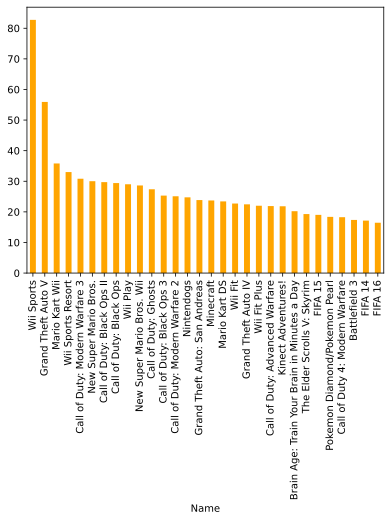

In [13]:
df.loc[df['Year'] >= 2000].groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(30).plot(kind='bar', color='orange')

###### марио, калл оф дути, марио, калл оф дути, марио, калл оф дути... 

<Axes: xlabel='Year'>

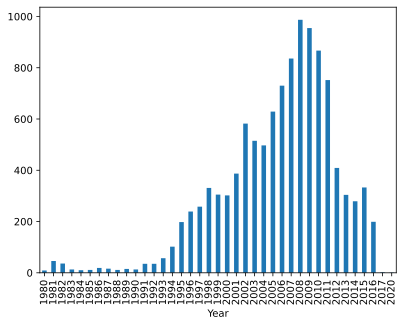

In [14]:
# Отобразите на графике общее число видеоигр, выпущенных в каждом году.
df.drop_duplicates(subset=['Name'])['Year'].dropna().astype(int).value_counts().sort_index().plot(kind='bar')

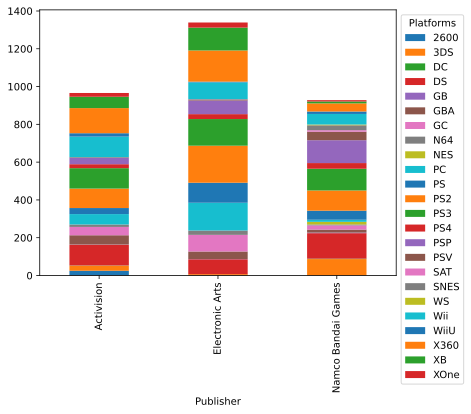

In [15]:
# Определите трех издателей, выпустивших наибольшее количество видеоигр.
# Изобразите количество выпущенных издателями видеоигр для каждой платформы
# на столбиковой диаграмме (можно использовать диаграмму с накоплением).
import pandas as pd

table = df[df['Publisher'].isin(df['Publisher'].value_counts().head(3).index.tolist())]
pd.crosstab(table['Publisher'], table['Platform']).plot(kind='bar', stacked=True)
plt.legend(title='Platforms', bbox_to_anchor=(1, 1))
plt.show()

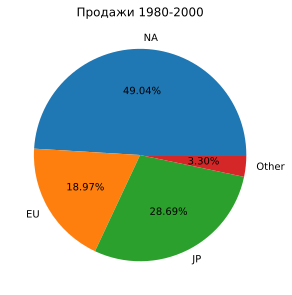

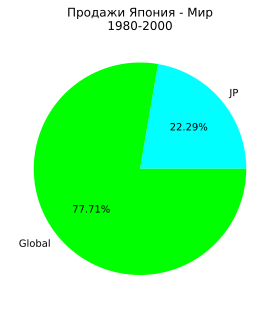

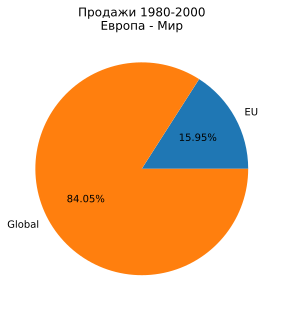

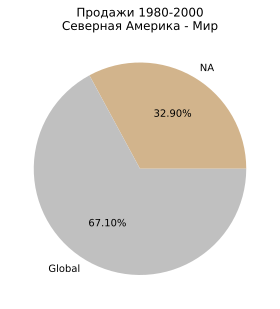

In [16]:
# Отобразите на круговых диаграммах доли суммарного объема продаж с 1980г. до 2000г. и с 2000г. до 2020г.
# в Северной Америке, Европе, Японии от объема продаж по всему миру.
group_1980_2000 = df[(df['Year'] >= 1980) & (df['Year'] < 2000)]
plt.pie(
    x=[np.sum(group_1980_2000.NA_Sales), np.sum(group_1980_2000.EU_Sales),
       np.sum(group_1980_2000.JP_Sales), np.sum(group_1980_2000.Other_Sales)],
    labels=["NA", "EU", "JP", "Other"],
    autopct='%1.2f%%')
plt.title('Продажи 1980-2000')
plt.show()

plt.pie(
    x=[np.sum(group_1980_2000.JP_Sales), np.sum(group_1980_2000.Global_Sales)],
    labels=["JP", "Global"],
    autopct='%1.2f%%',
    colors=['Aqua', 'Lime'])
plt.title('Продажи Япония - Мир\n1980-2000')
plt.show()

plt.pie(
    x=[np.sum(group_1980_2000.EU_Sales), np.sum(group_1980_2000.Global_Sales)],
    labels=["EU", "Global"],
    autopct='%1.2f%%')
plt.title('Продажи 1980-2000\nЕвропа - Мир')
plt.show()

plt.pie(
    x=[np.sum(group_1980_2000.NA_Sales), np.sum(group_1980_2000.Global_Sales)],
    labels=["NA", "Global"],
    autopct='%1.2f%%',
    colors=['Tan', 'Silver'])
plt.title('Продажи 1980-2000\nСеверная Америка - Мир')
plt.show()

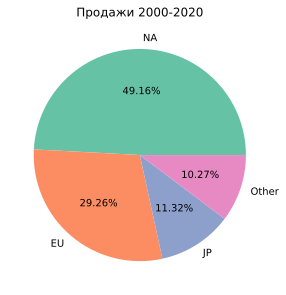

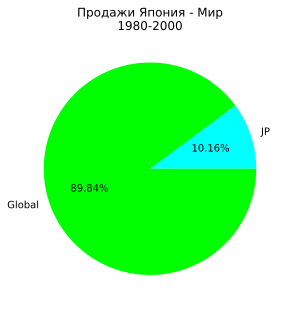

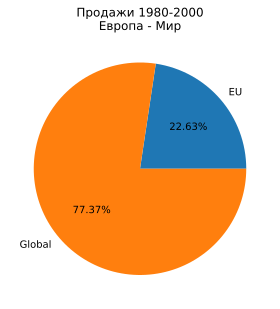

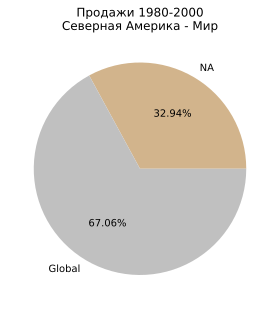

In [17]:
group_2000_2020 =  df[(df['Year'] >= 2000) & (df['Year'] < 2020)]
plt.pie(
    x=[np.sum(group_2000_2020.NA_Sales), np.sum(group_2000_2020.EU_Sales),
       np.sum(group_2000_2020.JP_Sales), np.sum(group_2000_2020.Other_Sales)],
    labels=["NA", "EU", "JP", "Other"],
    autopct='%1.2f%%',
    colors=sns.color_palette('Set2'))
plt.title('Продажи 2000-2020')
plt.show()

plt.pie(
    x=[np.sum(group_2000_2020.JP_Sales), np.sum(group_2000_2020.Global_Sales)],
    labels=["JP", "Global"],
    autopct='%1.2f%%',
    colors=['Aqua', 'Lime'])
plt.title('Продажи Япония - Мир\n1980-2000')
plt.show()

plt.pie(
    x=[np.sum(group_2000_2020.EU_Sales), np.sum(group_2000_2020.Global_Sales)],
    labels=["EU", "Global"],
    autopct='%1.2f%%')
plt.title('Продажи 1980-2000\nЕвропа - Мир')
plt.show()

plt.pie(
    x=[np.sum(group_2000_2020.NA_Sales), np.sum(group_2000_2020.Global_Sales)],
    labels=["NA", "Global"],
    autopct='%1.2f%%',
    colors=['Tan', 'Silver'])
plt.title('Продажи 1980-2000\nСеверная Америка - Мир')
plt.show()